In [1]:
import numpy as np
from skimage import io, color, exposure, transform
from skimage.color import rgb2gray
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split  #it came from update scikit learn. https://stackoverflow.com/questions/40704484/importerror-no-module-named-model-selection
import os
import glob
import h5py
import keras

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, model_from_json
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D,Conv1D
from keras.layers.pooling import MaxPooling2D

from keras.layers.convolutional import Convolution2D, MaxPooling2D

from keras.optimizers import SGD
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras import backend as K
K.set_image_data_format('channels_first')

from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

#import keras

NUM_CLASSES = 2
IMG_SIZE = 48
IMG_depth = 3

Using TensorFlow backend.
/home/atif/iai_ml_venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/atif/iai_ml_venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/atif/iai_ml_venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/atif/iai_ml_venv/lib/python3.6/site-packages/tenso

In [2]:
def preprocess_img(img):
    # Histogram normalization in y
    hsv = color.rgb2hsv(img)
    hsv[:,:,2] = exposure.equalize_hist(hsv[:,:,2])
    img = color.hsv2rgb(hsv)

    # central scrop
    min_side = min(img.shape[:-1])
    centre = img.shape[0]//2, img.shape[1]//2
    img = img[centre[0]-min_side//2:centre[0]+min_side//2,centre[1]-min_side//2:centre[1]+min_side//2,:]
#    img = rgb2gray(img)

    # rescale to standard size
    img = transform.resize(img, (IMG_SIZE, IMG_SIZE))

    # roll color axis to axis 0
    img = np.rollaxis(img,-1)

    return img

def get_class(img_path):
    return int(img_path.split('/')[-2])
#     return str(img_path.split('/')[-2]) # returning the folder name. If use -1 that means image name. consider the img_path.

In [3]:
imgs = []
labels = []
root_dir = '/home/atif/machine_learning_stuff/ml_image/copy_image/'
#path='/home/atif/training_by_several_learning_process/flower_photos/00000/'

#all_img_paths = glob.glob(path+ '5547758_eea9edfd54_n_000.jpg')

all_img_paths = glob.glob(os.path.join(root_dir, '*/*.png')) #I have done the training with .ppm format image. If another type of image will come 
                                                                                    #them .ppm will be changed by that extension
np.random.shuffle(all_img_paths)
for img_path in all_img_paths:
    try:
        img = preprocess_img(io.imread(img_path))
        label = get_class(img_path)
        imgs.append(img)
        labels.append(label)

        if len(imgs)%1200 == 0: print("Processed {}/{}".format(len(imgs), len(all_img_paths)))
            #print("get it 2")
    except (IOError, OSError):
        print('missed', img_path)
        pass

Processed 1200/7200
Processed 2400/7200
Processed 3600/7200
Processed 4800/7200
Processed 6000/7200
Processed 7200/7200


In [18]:
for i,j,k in os.walk(root_dir):
    for t in j:
        print(type(t))
        k = int(t)
        print(type(k))

<class 'str'>
<class 'int'>
<class 'str'>
<class 'int'>


In [99]:
# train_labels = keras.utils.to_categorical(labels, NUM_CLASSES,dtype='int16')

In [100]:
# X = np.array(imgs, dtype='float32')
# Y = np.array(labels)

# print('X shape: ', X.shape,' type: ',type(X))
# print('Y shape: ', Y.shape,' type: ',type(Y))

In [101]:
# B = np.reshape(Y, (-1, 2))
# print(B.shape)

In [5]:
X = np.array(imgs, dtype='float32') #Keeping the image as an array
# Y = np.eye(NUM_CLASSES, dtype='uint8')[labels]
Y = keras.utils.to_categorical(labels, NUM_CLASSES)

print('X shape: ', X.shape,' type: ',type(X))
print('Y shape: ', Y.shape,' type: ',type(Y))

X shape:  (7200, 3, 48, 48)  type:  <class 'numpy.ndarray'>
Y shape:  (7200, 2)  type:  <class 'numpy.ndarray'>


In [7]:
print(labels)

[1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 

In [5]:
# test_imgs=[]
# root_test_dir = r'/media/atif/0820209220208930/unreal_cv_documentation/ignore_from_git/keras_graph_AI/test/'
# # test_image_dir = glob.glob(os.path.join(root_test_dir, '*/*.png'))
# test_image_dir=glob.glob(root_test_dir+ '/*.png')

# np.random.shuffle(test_image_dir)
# for test_img_path in test_image_dir:
#     try:
#         img = preprocess_img(io.imread(test_img_path))
# #         label = get_class(img_path)
#         test_imgs.append(img)
# #         labels.append(label)

#         if len(test_imgs)%1000 == 0: print("Processed {}/{}".format(len(test_imgs), len(test_image_dir)))
#             #print("get it 2")
#     except (IOError, OSError):
#         print('missed', test_img_path)
#         pass

# Z = np.array(test_imgs, dtype='float32') #Keeping the image as an array
# # Z_label = np.eye(NUM_CLASSES, dtype='uint8')[labels]
# print(len(Z))
# print(Z.shape)
# # plt.show(1,3,0:,0:)
# # print(Z.ndim)
# # print(Z[0].size)

In [109]:
X = X.reshape(len(imgs),IMG_depth,IMG_SIZE,IMG_SIZE) # write (IMG_SIZE,IMG_SIZE,1 if you want channel last; 1= grayscale;3=RGB)
# plt.imshow(X[0],cmap="gray")
print(X.shape)
print(X.ndim)
print(X[0].shape)

print(X.shape)
print(Y.shape)

(7200, 3, 48, 48)
4
(3, 48, 48)
(7200, 3, 48, 48)
(7200,)


In [110]:
def cnn_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=(3, IMG_SIZE, IMG_SIZE),
                     activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), padding='same',
                     activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3, 3), padding='same',
                     activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(NUM_CLASSES, activation='softmax'))
    return model

model = cnn_model()

lr = 0.01
sgd = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
          optimizer=sgd,
          metrics=['accuracy'])

In [111]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 48, 48)        896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 46, 46)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 23, 23)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 23, 23)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 64, 23, 23)        18496     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 21, 21)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 64, 10, 10)        0         
__________

In [112]:
path = '/home/atif/machine_learning_stuff/model_file_keras/'

In [113]:
def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size = 32
epochs = 1
do_train_model=model.fit(X, train_label,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,verbose=2,
          #np.resize(img, (-1, <image shape>)
          callbacks=[LearningRateScheduler(lr_schedule),ModelCheckpoint(path+'07_aug_ep_1_label_string.h5', save_best_only=True)])

Train on 5760 samples, validate on 1440 samples
Epoch 1/1
 - 28s - loss: 0.3249 - acc: 0.8448 - val_loss: 0.0892 - val_acc: 0.9660


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


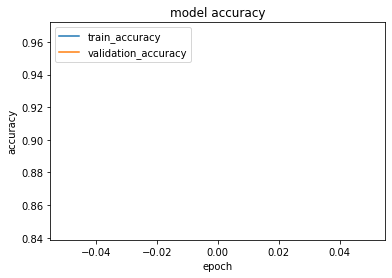

In [114]:
# history = model.fit(X, Y, validation_split=0.33, epochs=1, batch_size=32, verbose=0)
# list all data in history
print(do_train_model.history.keys())
# summarize history for accuracy
plt.plot(do_train_model.history['acc'])
plt.plot(do_train_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'validation_accuracy'], loc='upper left')
plt.rcParams['figure.figsize'] =(20,10)
plt.savefig(path+'epoch_vs_accuracy.jpg')
# plt.show()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


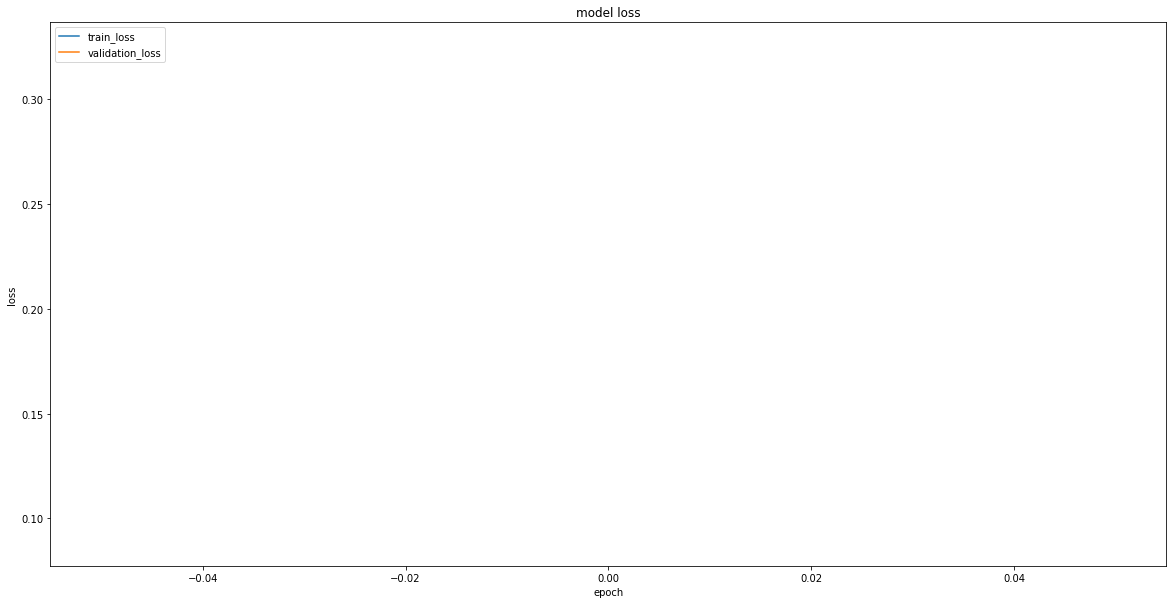

In [115]:
print(do_train_model.history.keys())
# summarize history for accuracy
plt.plot(do_train_model.history['loss'])
plt.plot(do_train_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'validation_loss'], loc='upper left')
plt.savefig(path+'epoch_vs_loss.jpg')
# plt.show()

In [116]:
from keras.models import load_model
model = load_model('/home/atif/machine_learning_stuff/model_file_keras/07_aug_ep_1_label_string.h5')
#for gray scale
def preprocess_img(img):
#     Histogram normalization in y
    hsv = color.rgb2hsv(img)
    hsv[:,:,2] = exposure.equalize_hist(hsv[:,:,2])
    img = color.hsv2rgb(hsv)

    # central scrop
    min_side = min(img.shape[:-1])
    centre = img.shape[0]//2, img.shape[1]//2
    img = img[centre[0]-min_side//2:centre[0]+min_side//2,
              centre[1]-min_side//2:centre[1]+min_side//2,
              :]
#     img = rgb2gray(img)

    # rescale to standard size
    img = transform.resize(img, (IMG_SIZE, IMG_SIZE))

    # roll color axis to axis 0
    img = np.rollaxis(img,-1)

    return img

import glob

path = r'/home/atif/machine_learning_stuff/ml_image/test_image_crop/'

my_name = ['SM_CalgonitFinish_2','SM_CalgonitFinishKlarspueler_5','SM_CalgonitFinishMaschinenpfleger_8','SM_CalgonitFinishSpezialSalz_11',
           'SM_CalgonitFinishVorratspack_14','SM_DenkMitEdelstahlreiniger_17','SM_DenkMitEdelstahlReinigerSpray_20','SM_DenkMitEntkalker_23',
           'SM_DenkMitGeschirrReiniger_26','SM_DenkMitGeschirrReinigerClassic_29','SM_DenkMitGeschirrReinigerEvo_32','SM_DenkMitGeschirrReinigerNature_35',
           'SM_DenkMitHygieneAllzweckreiniger_38','SM_DenkMitMaschinenpfleger_41','SM_DenkMitSpezialsalz_44','SM_SomatClassic_53']

img_path = glob.glob(path+ '/*.jpg')
for image in img_path:
    X_test=[]
    X_test.append(preprocess_img(io.imread(image)))
    X_test = np.array(X_test)
#     plt.imshow(X_test)
    X_test = X_test.reshape(len(X_test),3,IMG_SIZE,IMG_SIZE)
    
    print('image name is: ',image)
    predicted_class = model.predict_classes(X_test)
    print("predicted class: ",predicted_class)
#     print('type-of predicted calss: ', type(predicted_class))
    print('class name is: ',my_name[predicted_class[0]])
    
    probability = model.predict_proba(X_test)
    print("probability: ",probability)
    print('\n')
    
#     evaluate=model.evaluate(X_test)
#     print("\nEvaluation",evaluate)

image name is:  /home/atif/machine_learning_stuff/ml_image/test_image_crop/crop_clgo_finish_klarspueler.jpg
predicted class:  [1]
class name is:  SM_CalgonitFinishKlarspueler_5
probability:  [[3.0216819e-12 1.0000000e+00]]


image name is:  /home/atif/machine_learning_stuff/ml_image/test_image_crop/DenkMitEntkalker.jpg
predicted class:  [1]
class name is:  SM_CalgonitFinishKlarspueler_5
probability:  [[4.2109227e-25 1.0000000e+00]]


image name is:  /home/atif/machine_learning_stuff/ml_image/test_image_crop/DenkMitGeschirrReinigerClassic.jpg
predicted class:  [1]
class name is:  SM_CalgonitFinishKlarspueler_5
probability:  [[3.1039e-16 1.0000e+00]]


image name is:  /home/atif/machine_learning_stuff/ml_image/test_image_crop/CalgonitFinishKlarspueler.jpg
predicted class:  [1]
class name is:  SM_CalgonitFinishKlarspueler_5
probability:  [[1.1722544e-21 1.0000000e+00]]


image name is:  /home/atif/machine_learning_stuff/ml_image/test_image_crop/crop_CalgonitFinishKlarspuler.jpg
predicted 

In [49]:
import tensorflow as tf
from tensorflow.python.client import device_lib

In [50]:

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7613574926921769401, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6670460804252057397
 physical_device_desc: "device: XLA_CPU device"]